In [1]:
#next line is another way to install imblearn without using terminal
!pip3 install imblearn
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

PCOS = pd.read_csv("PCOS.csv")
PCOS.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [42]:
data = PCOS.loc[:, ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "Hip(inch)", "Waist(inch)", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"]]
data["H/W Ratio"] = data["Hip(inch)"]/data["Waist(inch)"]
data["Height(M)"] = data["Height(Cm)"]/100
data["BMI"] = data["Weight (Kg)"]/np.square(data["Height(M)"])
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])
missing_cols = data.columns[data.isna().any()].tolist()
for x in missing_cols:
    data[x] = data[x].fillna(data[x].mean())

## Analysis Part 2

    Method for this part is more for stakeholders (medical professionals) since these variables are easier to observe physically (not seperating hip and waist like in others' analysis in order to see if they can individually impact). 

In [3]:
ob_vars = PCOS.loc[:, ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)",
       'Height(Cm)','Pregnant(Y/N)', 'Hip(inch)', 'Waist(inch)', 'BMI',
                    'Weight gain(Y/N)',
                    "hair growth(Y/N)", 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', "Pimples(Y/N)"]]

In [4]:
ob_vars

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Pregnant(Y/N),Hip(inch),Waist(inch),BMI,Weight gain(Y/N),hair growth(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N)
0,0,28,44.6,152.000,0,36,30,19.3,0,0,0,0,0,0
1,0,36,65.0,161.500,1,38,32,#NAME?,0,0,0,0,0,0
2,1,33,68.8,165.000,1,40,36,#NAME?,0,0,0,0,1,1
3,0,37,65.0,148.000,0,42,36,#NAME?,0,0,0,0,0,0
4,0,25,52.0,161.000,1,37,30,#NAME?,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,0,28,26,18.5,0,0,0,0,0,0
537,0,30,63.2,158.000,1,34,32,25.3,1,0,0,0,0,0
538,0,36,54.0,152.000,0,30,28,23.4,0,0,0,0,0,0
539,0,27,50.0,150.000,0,28,26,22.2,0,0,0,0,0,1


In [6]:
cleaned_ob_vars = ob_vars[~ob_vars['Age (yrs)'].isnull()]

In [7]:
obs = cleaned_ob_vars.rename(columns={"PCOS (Y/N)": "PCOS", 
       'Height(Cm)':'height', 'Hip(inch)': 'hip', 'Waist(inch)': 'waist', 
                    "hair growth(Y/N)": "hair_growth",
       'Skin darkening (Y/N)': 'skin_darkening', 'Hair loss(Y/N)': 'hair_loss', "Pimples(Y/N)": "pimples"})

In [8]:
obs

,PCOS,Age (yrs),Weight (Kg),height,Pregnant(Y/N),hip,waist,BMI,Weight gain(Y/N),hair_growth,hair_growth,skin_darkening,hair_loss,pimples
0,0,28,44.6,152.000,0,36,30,19.3,0,0,0,0,0,0
1,0,36,65.0,161.500,1,38,32,#NAME?,0,0,0,0,0,0
2,1,33,68.8,165.000,1,40,36,#NAME?,0,0,0,0,1,1
3,0,37,65.0,148.000,0,42,36,#NAME?,0,0,0,0,0,0
4,0,25,52.0,161.000,1,37,30,#NAME?,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,0,28,26,18.5,0,0,0,0,0,0
537,0,30,63.2,158.000,1,34,32,25.3,1,0,0,0,0,0
538,0,36,54.0,152.000,0,30,28,23.4,0,0,0,0,0,0
539,0,27,50.0,150.000,0,28,26,22.2,0,0,0,0,0,1


In [32]:
needed = ob_vars.loc[:, ["Hip(inch)", "Waist(inch)"]]
needed

,Hip(inch),Waist(inch)
0,36,30
1,38,32
2,40,36
3,42,36
4,37,30
...,...,...
536,28,26
537,34,32
538,30,28
539,28,26


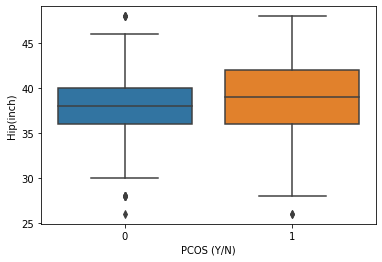

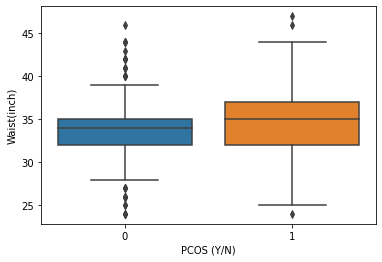

In [47]:
for y in needed.columns:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=ob_vars)
    plt.show()

    Other EDA (for categorical variables) already done in https://github.com/ericaez/STAT-303-2-Project/blob/main/PCOS%20Project.ipynb. 

## Checking autocorrelation/potential violations

    Trying Chapter 6 from Class Notes on our own data.

In [72]:
%pylab inline
plt.rcParams['figure.figsize'] = [9, 5]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [84]:
# A few helper functions
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation
def build_model(features):
  X=sm.add_constant(ob_vars[features])
  y=ob_vars['power']
  model = sm.OLS(y,X, missing='drop').fit()
  predictions = model.predict(X) 
  display(model.summary()) 
  res=y-predictions
  return res 

def plt_residual(res):
  plt.plot(range(len(res)), res) 
  plt.ylabel('Residual')
  plt.xlabel("Hour")

def plt_residual_lag(res, nlag):
  x=res.values
  y=res.shift(nlag).values
  sns.kdeplot(x,y=y,color='blue',shade=True )
  plt.xlabel('res')
  plt.ylabel("res-lag-{}".format(nlag))
  rho,p=corrcoef(x,y)
  plt.title("n_lag={} hours, correlation={:f}".format(nlag, rho))
  
def plt_acf(res):
  plt.rcParams['figure.figsize'] = [18, 5]
  acorr = sm.tsa.acf(res.dropna(), nlags = len(res.dropna())-1)
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.plot(acorr)
  ax1.set_ylabel('corr')
  ax1.set_xlabel('n_lag')
  ax1.set_title('Auto Correlation')
  ax2.plot(acorr[:4*7*24])
  ax2.set_ylabel('corr')
  ax2.set_xlabel('n_lag')
  ax2.set_title('Auto Correlation (4-week zoomed in) ')
  plt.show()
  pd.set_option('display.max_columns', None)
  adf=pd.DataFrame(np.round(acorr[:30*24],2).reshape([30, 24] ))
  adf.index.name='day'
  display(adf)
  plt.rcParams['figure.figsize'] = [9, 5]

def corrcoef(x,y):
    a,b=ma.masked_invalid(x),ma.masked_invalid(y)
    msk = (~a.mask & ~b.mask)
    return pearsonr(x[msk],y[msk])[0], normaltest(res, nan_policy='omit')[1]

<AxesSubplot:>

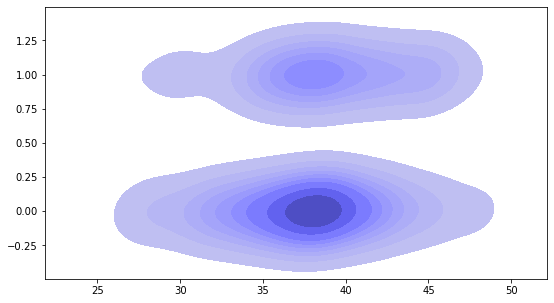

In [85]:
sns.kdeplot(ob_vars['Hip(inch)'].values, y=ob_vars['PCOS (Y/N)'].values,color='blue',shade=True )

<AxesSubplot:>

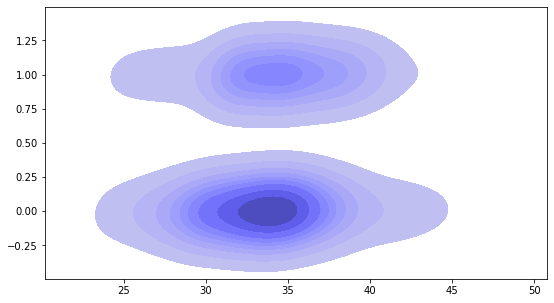

In [86]:
sns.kdeplot(ob_vars['Waist(inch)'].values, y=ob_vars['PCOS (Y/N)'].values,color='blue',shade=True)